<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/Multi_label_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [4]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [5]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
data.shape[0]

7254

In [7]:
img_width =250
img_hight =250

x = []
for i in tqdm(range(data.shape[0])):   # not more then 4000 image can be processed with this available ram size
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path,target_size=(img_width,img_hight,3))
  img = image.img_to_array(img)
  img = img/255
  x.append(img)

x = np.array(x)

100%|██████████| 7254/7254 [00:32<00:00, 221.94it/s]


In [8]:
data.shape

(7254, 27)

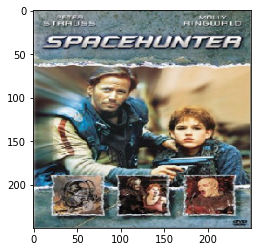

In [9]:
plt.imshow(x[39])

In [10]:
data['Genre'][39]

"['Action', 'Adventure', 'Sci-Fi']"

In [11]:
x.shape

(7254, 250, 250, 3)

In [12]:
y = data.drop(['Id','Genre'],axis =1)
y = y.to_numpy()
y.shape

(7254, 25)

In [13]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size =0.15,random_state=0)

In [14]:
x_train.shape , x_test.shape

((6165, 250, 250, 3), (1089, 250, 250, 3))

In [15]:
y_train.shape , y_test.shape

((6165, 25), (1089, 25))

## Build CNN

In [16]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 248, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 122, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,epochs=10,verbose =1,batch_size =20,validation_data=(x_test,y_test))

Epoch 1/10
309/309 [==============================] - 464s 2s/step - loss: 0.5982 - accuracy: 0.1249 - val_loss: 0.3140 - val_accuracy: 0.1901
Epoch 2/10
309/309 [==============================] - 465s 2s/step - loss: 0.2730 - accuracy: 0.2704 - val_loss: 0.2425 - val_accuracy: 0.2635
Epoch 3/10
309/309 [==============================] - 462s 1s/step - loss: 0.2544 - accuracy: 0.2826 - val_loss: 0.2411 - val_accuracy: 0.2645
Epoch 4/10
309/309 [==============================] - 464s 2s/step - loss: 0.2486 - accuracy: 0.3002 - val_loss: 0.2393 - val_accuracy: 0.1956
Epoch 5/10
309/309 [==============================] - 466s 2s/step - loss: 0.2428 - accuracy: 0.3158 - val_loss: 0.2444 - val_accuracy: 0.1901
Epoch 6/10
309/309 [==============================] - 464s 2s/step - loss: 0.2401 - accuracy: 0.3257 - val_loss: 0.2422 - val_accuracy: 0.1919
Epoch 7/10
309/309 [==============================] - 464s 2s/step - loss: 0.2380 - accuracy: 0.3283 - val_loss: 0.2359 - val_accuracy: 0.2140

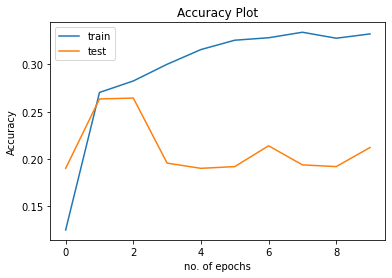

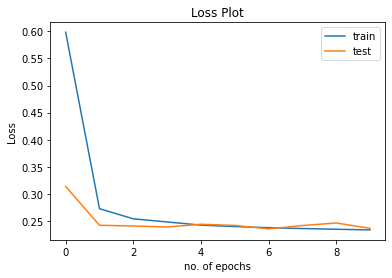

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no. of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.title('Accuracy Plot')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no. of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.title('Loss Plot')
plt.show()

# Model Testing

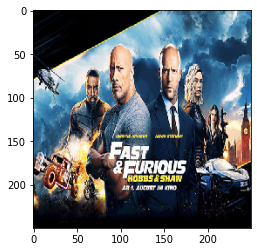

In [28]:
img = image.load_img('/content/Movies-Poster_Dataset/fast.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_hight,3)

classes = data.columns[2:]
pred = model.predict(img)

In [31]:
print(classes)
pred

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


array([[0.30792877, 0.2690318 , 0.11353415, 0.0583165 , 0.41407168,
        0.15286246, 0.09825388, 0.36753345, 0.12567386, 0.14168954,
        0.03816259, 0.07106137, 0.05127433, 0.02314836, 0.05170289,
        0.00211418, 0.00262007, 0.00062785, 0.12720692, 0.11825207,
        0.00520453, 0.04234764, 0.11474687, 0.01925421, 0.01197308]],
      dtype=float32)

In [36]:
np.argsort(pred[0])

array([17, 15, 16, 20, 24, 23, 13, 10, 21, 12, 14,  3, 11,  6,  2, 22, 19,
        8, 18,  9,  5,  1,  0,  7,  4])

In [40]:
top_3 = np.argsort(pred[0])[:-4:-1]
for i in range(3):
  print(classes[top_3][i])

Comedy
Drama
Action


Drama
Action
Romance


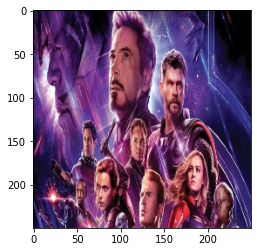

In [41]:
# for Endgame Movie
img = image.load_img('/content/Movies-Poster_Dataset/endgame.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_hight,3)

classes = data.columns[2:]
pred = model.predict(img)
top_3 = np.argsort(pred[0])[:-4:-1]
for i in range(3):
  print(classes[top_3][i])

Drama
Action
Comedy


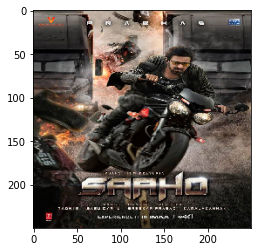

In [42]:
# for saaho Movie
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg',target_size=(img_width,img_hight,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_hight,3)

classes = data.columns[2:]
pred = model.predict(img)
top_3 = np.argsort(pred[0])[:-4:-1]
for i in range(3):
  print(classes[top_3][i])